In [128]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers
from tensorflow import keras

In [129]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [130]:
X_train.shape

(50000, 32, 32, 3)

In [131]:
y_train.shape

(50000, 1)

In [132]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [133]:
y_train=y_train.reshape(-1)

In [134]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [135]:
def plt_show(X,y,index):
  plt.figure(figsize=(10, 3))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])


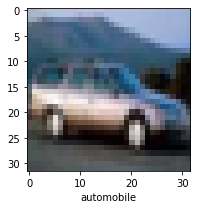

In [136]:
plt_show(X_train,y_train,4)

In [140]:
X_train/255



array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

In [12]:
model=keras.Sequential([
     keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(
optimizer='adam',
loss='SparseCategoricalCrossentropy',
metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 89s 56ms/step - loss: 1.8909 - accuracy: 0.3295
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.6650 - accuracy: 0.4047
Epoch 3/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.5899 - accuracy: 0.4290
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5321 - accuracy: 0.4534
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.4999 - accuracy: 0.4609
Epoch 6/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4648 - accuracy: 0.4753
Epoch 7/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4487 - accuracy: 0.4817
Epoch 8/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4226 - accuracy: 0.4900
Epoch 9/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4023 - accuracy: 0.4978
Epoch 10/10
1563/1563 [==============================] - 86s 55m

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
model.evaluate(X_test,y_test)
y_preds=model.predict(X_test)



313/313 [==============================] - 3s 9ms/step - loss: 1.4926 - accuracy: 0.4644


In [49]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.45      0.62      0.52      1000
           1       0.56      0.67      0.61      1000
           2       0.31      0.41      0.35      1000
           3       0.34      0.26      0.30      1000
           4       0.43      0.39      0.41      1000
           5       0.37      0.42      0.39      1000
           6       0.52      0.49      0.51      1000
           7       0.57      0.51      0.54      1000
           8       0.59      0.53      0.56      1000
           9       0.64      0.32      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



In [15]:
y_preds

array([[3.6225942e-01, 3.3016843e-01, 2.1278036e-01, ..., 4.7203004e-02,
        7.3393708e-01, 7.5621158e-02],
       [6.8060124e-01, 8.5097134e-01, 7.2267562e-02, ..., 8.9451671e-04,
        9.3980855e-01, 9.7583544e-01],
       [8.7074542e-01, 7.9738355e-01, 2.5219923e-01, ..., 1.0197234e-01,
        9.4065481e-01, 4.9995708e-01],
       ...,
       [3.6105633e-02, 9.7414851e-03, 7.0818043e-01, ..., 1.5890667e-01,
        2.7810568e-01, 2.4807304e-02],
       [1.3071397e-01, 2.8408360e-01, 5.0530219e-01, ..., 1.6148147e-01,
        1.4338335e-01, 1.1790988e-01],
       [2.7097559e-01, 4.9125284e-02, 6.3617861e-01, ..., 9.3172312e-01,
        4.0281206e-02, 3.6146909e-02]], dtype=float32)

In [17]:
y_preds[0]

array([0.36225942, 0.33016843, 0.21278036, 0.62719977, 0.28238404,
       0.48911512, 0.11602768, 0.047203  , 0.7339371 , 0.07562116],
      dtype=float32)

In [20]:
np.argmax(y_preds[0])

8

In [25]:
y_classes=[np.argmax(element) for element in y_preds]

In [27]:
y_classes

[8,
 9,
 8,
 8,
 4,
 6,
 3,
 6,
 5,
 1,
 0,
 9,
 5,
 7,
 1,
 8,
 7,
 3,
 8,
 6,
 2,
 0,
 0,
 9,
 4,
 2,
 6,
 4,
 1,
 6,
 6,
 4,
 4,
 2,
 9,
 1,
 2,
 1,
 1,
 5,
 0,
 6,
 3,
 2,
 0,
 8,
 5,
 3,
 4,
 4,
 9,
 4,
 6,
 3,
 8,
 8,
 5,
 8,
 5,
 2,
 7,
 3,
 7,
 5,
 6,
 2,
 1,
 2,
 5,
 9,
 2,
 7,
 8,
 8,
 0,
 2,
 0,
 5,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 7,
 0,
 8,
 8,
 8,
 0,
 4,
 8,
 6,
 4,
 5,
 4,
 0,
 0,
 7,
 2,
 5,
 6,
 5,
 1,
 1,
 5,
 6,
 3,
 5,
 3,
 5,
 2,
 2,
 9,
 5,
 0,
 8,
 7,
 5,
 8,
 4,
 1,
 2,
 0,
 2,
 0,
 5,
 4,
 0,
 4,
 1,
 9,
 1,
 0,
 3,
 9,
 7,
 2,
 8,
 2,
 5,
 6,
 5,
 8,
 0,
 6,
 5,
 5,
 3,
 8,
 1,
 4,
 0,
 0,
 5,
 2,
 8,
 3,
 4,
 0,
 7,
 2,
 4,
 0,
 7,
 8,
 6,
 9,
 4,
 9,
 7,
 1,
 2,
 7,
 9,
 0,
 3,
 3,
 0,
 8,
 7,
 6,
 2,
 2,
 8,
 6,
 3,
 7,
 8,
 4,
 5,
 2,
 1,
 7,
 2,
 8,
 2,
 5,
 5,
 5,
 8,
 8,
 4,
 1,
 5,
 0,
 2,
 7,
 8,
 2,
 1,
 3,
 7,
 8,
 0,
 8,
 9,
 0,
 7,
 7,
 6,
 8,
 6,
 3,
 7,
 3,
 2,
 0,
 0,
 3,
 1,
 1,
 1,
 8,
 0,
 4,
 0,
 6,
 5,
 1,
 1,
 7,
 8,
 0,
 3,
 7,
 0,
 2,
 1,


In [48]:
cnn=keras.Sequential([
    
     
    layers.Conv2D(32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    
    layers.Dense(10, activation ='softmax')
    
])

cnn.compile(
optimizer='adam',
loss='SparseCategoricalCrossentropy',
metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4235 - accuracy: 0.4879
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0889 - accuracy: 0.6176
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9626 - accuracy: 0.6669
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8735 - accuracy: 0.6955
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8059 - accuracy: 0.7183
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7502 - accuracy: 0.7395
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7009 - accuracy: 0.7562
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6571 - accuracy: 0.7710
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6160 - accuracy: 0.7871
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [41]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [42]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnn.evaluate(X_test,y_test)
y_preds=cnn.predict(X_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9108 - accuracy: 0.6976


In [65]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [67]:
y_classes=[np.argmax(element) for element in y_preds]

In [68]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.84      0.82      0.83      1000
           2       0.52      0.68      0.59      1000
           3       0.49      0.55      0.52      1000
           4       0.66      0.60      0.63      1000
           5       0.61      0.58      0.60      1000
           6       0.78      0.76      0.77      1000
           7       0.80      0.69      0.74      1000
           8       0.81      0.81      0.81      1000
           9       0.78      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [69]:
y_classes

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 2,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 2,
 6,
 0,
 1,
 6,
 6,
 5,
 4,
 5,
 9,
 1,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 2,
 9,
 0,
 6,
 3,
 8,
 8,
 5,
 7,
 5,
 2,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 0,
 3,
 2,
 0,
 5,
 8,
 8,
 9,
 2,
 0,
 5,
 5,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 2,
 8,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 3,
 5,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 6,
 5,
 8,
 3,
 1,
 2,
 8,
 0,
 0,
 3,
 3,
 2,
 2,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 3,
 5,
 6,
 5,
 8,
 9,
 6,
 5,
 5,
 3,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 0,
 7,
 8,
 4,
 9,
 0,
 9,
 9,
 9,
 2,
 9,
 9,
 3,
 7,
 3,
 0,
 0,
 5,
 2,
 2,
 6,
 8,
 6,
 2,
 3,
 0,
 5,
 9,
 2,
 1,
 7,
 6,
 8,
 8,
 7,
 3,
 3,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 5,
 5,
 9,
 8,
 5,
 1,
 9,
 0,
 2,
 4,
 6,
 9,
 3,
 3,
 9,
 3,
 0,
 3,
 6,
 5,
 1,
 3,
 8,
 8,
 0,
 4,
 9,
 5,
 3,
 1,
 9,
 8,
 9,
 0,
 6,
 9,
 8,
 2,
 0,


In [70]:
y_preds[0]

array([6.9730208e-06, 3.6094398e-06, 1.6240949e-03, 9.5284235e-01,
       5.7262124e-04, 4.2841271e-02, 9.8185614e-04, 4.6607375e-04,
       6.6098053e-04, 9.4211529e-08], dtype=float32)

In [73]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [75]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

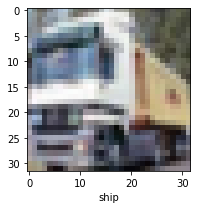

In [121]:
plt_show(y_classes,y_test,1)

In [79]:
np.argmax(X_test[0])

2421

In [81]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

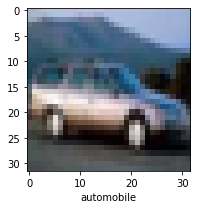

In [82]:
plt_show(X_train,y_train,4)

In [83]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [84]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [86]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [93]:
y_test=y_test.reshape(-1,)

In [91]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [92]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [112]:
y_test[0]

3

In [102]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

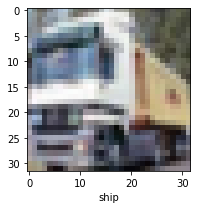

In [110]:
plt_show(X_test,y_test,1)

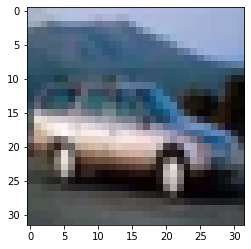

In [109]:
plt.imshow(X_train[4])

In [111]:
y_classes[0]

3

In [114]:
classes[y_classes[0]]

'cat'

In [116]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [117]:
y_test[0]

3

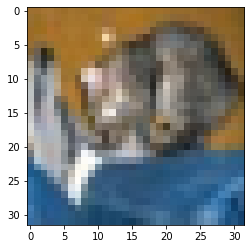

In [120]:
plt.imshow(X_test[0])

In [122]:
y_classes[0]

3

In [123]:
y_test[0]

3

In [125]:
classes[y_classes[0]]

'cat'

In [127]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0